In [106]:
import random
import math
import numpy as np
import matplotlib.pyplot as plt
 
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Input, Dropout, Flatten, Conv2D, MaxPooling2D, Reshape
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.optimizers import SGD, Adam

import tensorflow.keras as keras
import tensorflow as tf
import tensorflow.keras.datasets.fashion_mnist as fashion_mnist

NUM_EPOCHS = 15

(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

print("x_train shape:", x_train.shape, "y_train shape:", y_train.shape)

def fnn_k_layer(k):
    """
    Creates a K layer feedforward neural network where K is the number of hidden layers.
    Each hidden layer is a Dense 128 node layer.
    """
    layers = []
    
    layers.append(Flatten(input_shape=(28, 28)))
    for i in range(k):
        layers.append(Dense(128, activation=tf.nn.relu))
    layers.append(Dense(10, activation=tf.nn.softmax))
    return keras.Sequential(layers)

def cnn_1_layer():
    """
    Creates a convolution neural network with one convolution layer.
    Uses Dropout layers to avoid overfitting.
    """
    model = keras.Sequential()
    model.add(Reshape((28, 28, 1)))
    model.add(Conv2D(32, kernel_size=(5, 5), activation='relu', input_shape=(28, 28, 1)))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.5))
    model.add(Flatten())
    model.add(Dense(128, activation='relu'))
    model.add(Dropout(0.2))
    model.add(Dense(10, activation='softmax'))
    return model

def cnn_3_layer():
    """
    Creates a convolutional neural network with three convolution layers.
    Uses Dropout to avoid overfitting.
    Uses MaxPooling to reduce dimensionality of the image.
    """
    model = keras.Sequential()
    model.add(Reshape((28, 28, 1)))
    model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1)))   
    model.add(MaxPooling2D((2, 2)))
    model.add(Dropout(0.4))

    model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.4))

    model.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
    model.add(Dropout(0.4))

    model.add(Flatten())

    model.add(Dense(128, activation='relu'))
    model.add(Dropout(0.2))
    model.add(Dense(10, activation='softmax'))
    return model

def cnn_4_layer():
    """
    Creates a convolutional neural network with four convolution layers.
    Uses Dropout to avoid overfitting.
    Uses MaxPooling to reduce dimensionality of the image.
    """
    model = keras.Sequential()
    model.add(Reshape((28, 28, 1)))
    model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1)))    
    model.add(BatchNormalization())

    model.add(Conv2D(32, kernel_size=(3, 3), activation='relu'))
    model.add(BatchNormalization())
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.4))

    model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
    model.add(BatchNormalization())
    model.add(Dropout(0.4))

    model.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
    model.add(BatchNormalization())
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.4))

    model.add(Flatten())

    model.add(Dense(512, activation='relu'))
    model.add(BatchNormalization())
    model.add(Dropout(0.4))

    model.add(Dense(128, activation='relu'))
    model.add(BatchNormalization())
    model.add(Dropout(0.2))

    model.add(Dense(10, activation='softmax'))
    return model

def compile_model(model):
    """
    Compile and train @model with training data @x_train and @y_train.
    """
    model.compile(loss=tf.keras.losses.CategoricalCrossentropy(), 
                  optimizer=Adam(),
                  # NOTE: keras.metrics.Accuracy() gives very poor results. Not sure why.
                  # So use hardcoded "accuracy" string instead. Doesn't feel good.
                  metrics=["accuracy"])
    return model

def evaluate_model(model):
    """
    Evaluate the model by fitting it to the training data and testing it on the test data. Returns the accuracy
    on the test data.
    """
    model.fit(normalize_pixels(x_train), to_categorical(y_train), shuffle=True, validation_split=0.33, epochs=NUM_EPOCHS, verbose=1)
    te_loss, te_accuracy = model.evaluate(normalize_pixels(x_test), to_categorical(y_test))
    return te_accuracy

def evaluate_n_models(models):
    """
    Evaluates a list of models. Returns the corresponding test accuracies after evaluation.
    """
    test_accuracies = np.zeros(len(models))
    for i, model in enumerate(models):
        test_accuracies[i] = evaluate_model(compile_model(model))
    return test_accuracies
    
def plot_accuracies(x, y, title):
    """
    Simply plots two lists in 2D. Used for showing test accuracies in report.
    """
    plt.title(title)
    plt.plot(x, y)
    plt.scatter(x, y)
    plt.show()
        

def plot_history(history):
    """
    Plots the validation and training accuracies for a <history> of a model.fit() call.
    """
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['train_accuracy', 'validation_accuracy'], loc='best')
    plt.show()
    
def normalize_pixels(x):
    """
    Input images consist of grayscale pixels with values between 0-255.
    """
    return x / 255.0

x_train shape: (60000, 28, 28) y_train shape: (60000,)


In [54]:
def fnn_eval():
    K = 14
    model_list = []
    for i, k in enumerate(range(1, K+1)):
        model_list.append(fnn_k_layer(k))

    fnn_accs = evaluate_n_models(model_list)
    return fnn_accs

--
Model: "sequential_69"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_94 (Flatten)         (None, 784)               0         
_________________________________________________________________
dense_359 (Dense)            (None, 128)               100480    
_________________________________________________________________
dense_360 (Dense)            (None, 10)                1290      
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________
Train on 40199 samples, validate on 19801 samples
Epoch 1/20
40199/40199 [==============================] - 3s 67us/sample - loss: 0.5375 - accuracy: 0.8117 - val_loss: 0.4340 - val_accuracy: 0.8491
Epoch 2/20
40199/40199 [==============================] - 2s 59us/sample - loss: 0.3989 - accuracy: 0.8571 - val_loss: 0.3754 - val_accuracy: 0.8663
Epoch 3/20
40199/40199 [==

Model: "sequential_70"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_95 (Flatten)         (None, 784)               0         
_________________________________________________________________
dense_361 (Dense)            (None, 128)               100480    
_________________________________________________________________
dense_362 (Dense)            (None, 128)               16512     
_________________________________________________________________
dense_363 (Dense)            (None, 10)                1290      
Total params: 118,282
Trainable params: 118,282
Non-trainable params: 0
_________________________________________________________________
Train on 40199 samples, validate on 19801 samples
Epoch 1/20
40199/40199 [==============================] - 3s 76us/sample - loss: 0.5260 - accuracy: 0.8114 - val_loss: 0.4395 - val_accuracy: 0.8402
Epoch 2/20
40199/40199 [======================

Model: "sequential_71"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_96 (Flatten)         (None, 784)               0         
_________________________________________________________________
dense_364 (Dense)            (None, 128)               100480    
_________________________________________________________________
dense_365 (Dense)            (None, 128)               16512     
_________________________________________________________________
dense_366 (Dense)            (None, 128)               16512     
_________________________________________________________________
dense_367 (Dense)            (None, 10)                1290      
Total params: 134,794
Trainable params: 134,794
Non-trainable params: 0
_________________________________________________________________
Train on 40199 samples, validate on 19801 samples
Epoch 1/20
40199/40199 [==============================] - 3s 78

Model: "sequential_72"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_97 (Flatten)         (None, 784)               0         
_________________________________________________________________
dense_368 (Dense)            (None, 128)               100480    
_________________________________________________________________
dense_369 (Dense)            (None, 128)               16512     
_________________________________________________________________
dense_370 (Dense)            (None, 128)               16512     
_________________________________________________________________
dense_371 (Dense)            (None, 128)               16512     
_________________________________________________________________
dense_372 (Dense)            (None, 10)                1290      
Total params: 151,306
Trainable params: 151,306
Non-trainable params: 0
_______________________________________________

Model: "sequential_73"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_98 (Flatten)         (None, 784)               0         
_________________________________________________________________
dense_373 (Dense)            (None, 128)               100480    
_________________________________________________________________
dense_374 (Dense)            (None, 128)               16512     
_________________________________________________________________
dense_375 (Dense)            (None, 128)               16512     
_________________________________________________________________
dense_376 (Dense)            (None, 128)               16512     
_________________________________________________________________
dense_377 (Dense)            (None, 128)               16512     
_________________________________________________________________
dense_378 (Dense)            (None, 10)              

Model: "sequential_74"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_99 (Flatten)         (None, 784)               0         
_________________________________________________________________
dense_379 (Dense)            (None, 128)               100480    
_________________________________________________________________
dense_380 (Dense)            (None, 128)               16512     
_________________________________________________________________
dense_381 (Dense)            (None, 128)               16512     
_________________________________________________________________
dense_382 (Dense)            (None, 128)               16512     
_________________________________________________________________
dense_383 (Dense)            (None, 128)               16512     
_________________________________________________________________
dense_384 (Dense)            (None, 128)             

Model: "sequential_75"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_100 (Flatten)        (None, 784)               0         
_________________________________________________________________
dense_386 (Dense)            (None, 128)               100480    
_________________________________________________________________
dense_387 (Dense)            (None, 128)               16512     
_________________________________________________________________
dense_388 (Dense)            (None, 128)               16512     
_________________________________________________________________
dense_389 (Dense)            (None, 128)               16512     
_________________________________________________________________
dense_390 (Dense)            (None, 128)               16512     
_________________________________________________________________
dense_391 (Dense)            (None, 128)             

Model: "sequential_76"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_101 (Flatten)        (None, 784)               0         
_________________________________________________________________
dense_394 (Dense)            (None, 128)               100480    
_________________________________________________________________
dense_395 (Dense)            (None, 128)               16512     
_________________________________________________________________
dense_396 (Dense)            (None, 128)               16512     
_________________________________________________________________
dense_397 (Dense)            (None, 128)               16512     
_________________________________________________________________
dense_398 (Dense)            (None, 128)               16512     
_________________________________________________________________
dense_399 (Dense)            (None, 128)             

Model: "sequential_77"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_102 (Flatten)        (None, 784)               0         
_________________________________________________________________
dense_403 (Dense)            (None, 128)               100480    
_________________________________________________________________
dense_404 (Dense)            (None, 128)               16512     
_________________________________________________________________
dense_405 (Dense)            (None, 128)               16512     
_________________________________________________________________
dense_406 (Dense)            (None, 128)               16512     
_________________________________________________________________
dense_407 (Dense)            (None, 128)               16512     
_________________________________________________________________
dense_408 (Dense)            (None, 128)             

Model: "sequential_78"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_103 (Flatten)        (None, 784)               0         
_________________________________________________________________
dense_413 (Dense)            (None, 128)               100480    
_________________________________________________________________
dense_414 (Dense)            (None, 128)               16512     
_________________________________________________________________
dense_415 (Dense)            (None, 128)               16512     
_________________________________________________________________
dense_416 (Dense)            (None, 128)               16512     
_________________________________________________________________
dense_417 (Dense)            (None, 128)               16512     
_________________________________________________________________
dense_418 (Dense)            (None, 128)             

Model: "sequential_79"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_104 (Flatten)        (None, 784)               0         
_________________________________________________________________
dense_424 (Dense)            (None, 128)               100480    
_________________________________________________________________
dense_425 (Dense)            (None, 128)               16512     
_________________________________________________________________
dense_426 (Dense)            (None, 128)               16512     
_________________________________________________________________
dense_427 (Dense)            (None, 128)               16512     
_________________________________________________________________
dense_428 (Dense)            (None, 128)               16512     
_________________________________________________________________
dense_429 (Dense)            (None, 128)             

Model: "sequential_80"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_105 (Flatten)        (None, 784)               0         
_________________________________________________________________
dense_436 (Dense)            (None, 128)               100480    
_________________________________________________________________
dense_437 (Dense)            (None, 128)               16512     
_________________________________________________________________
dense_438 (Dense)            (None, 128)               16512     
_________________________________________________________________
dense_439 (Dense)            (None, 128)               16512     
_________________________________________________________________
dense_440 (Dense)            (None, 128)               16512     
_________________________________________________________________
dense_441 (Dense)            (None, 128)             

Model: "sequential_81"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_106 (Flatten)        (None, 784)               0         
_________________________________________________________________
dense_449 (Dense)            (None, 128)               100480    
_________________________________________________________________
dense_450 (Dense)            (None, 128)               16512     
_________________________________________________________________
dense_451 (Dense)            (None, 128)               16512     
_________________________________________________________________
dense_452 (Dense)            (None, 128)               16512     
_________________________________________________________________
dense_453 (Dense)            (None, 128)               16512     
_________________________________________________________________
dense_454 (Dense)            (None, 128)             

Model: "sequential_82"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_107 (Flatten)        (None, 784)               0         
_________________________________________________________________
dense_463 (Dense)            (None, 128)               100480    
_________________________________________________________________
dense_464 (Dense)            (None, 128)               16512     
_________________________________________________________________
dense_465 (Dense)            (None, 128)               16512     
_________________________________________________________________
dense_466 (Dense)            (None, 128)               16512     
_________________________________________________________________
dense_467 (Dense)            (None, 128)               16512     
_________________________________________________________________
dense_468 (Dense)            (None, 128)             

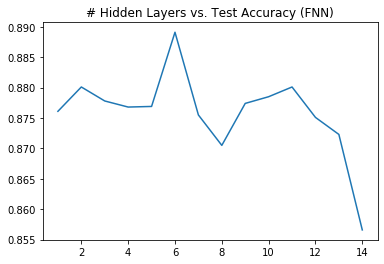

In [65]:
plot_accuracies(range(1, K+1), fnn_accs, "# Hidden Layers vs. Test Accuracy (FNN)")

In [104]:
cnn_accs = evaluate_n_models([cnn_1_layer(), cnn_3_layer(), cnn_4_layer()])

Train on 40199 samples, validate on 19801 samples
Epoch 1/15
40199/40199 [==============================] - 13s 317us/sample - loss: 0.5117 - accuracy: 0.8172 - val_loss: 0.3588 - val_accuracy: 0.8701
Epoch 2/15
40199/40199 [==============================] - 12s 309us/sample - loss: 0.3622 - accuracy: 0.8688 - val_loss: 0.3079 - val_accuracy: 0.8869
Epoch 3/15
40199/40199 [==============================] - 12s 303us/sample - loss: 0.3244 - accuracy: 0.8812 - val_loss: 0.2849 - val_accuracy: 0.8957
Epoch 4/15
40199/40199 [==============================] - 12s 309us/sample - loss: 0.2992 - accuracy: 0.8895 - val_loss: 0.2788 - val_accuracy: 0.8988
Epoch 5/15
40199/40199 [==============================] - 13s 316us/sample - loss: 0.2773 - accuracy: 0.8973 - val_loss: 0.2719 - val_accuracy: 0.8986
Epoch 6/15
40199/40199 [==============================] - 13s 320us/sample - loss: 0.2638 - accuracy: 0.9018 - val_loss: 0.2551 - val_accuracy: 0.9050
Epoch 7/15
40199/40199 [====================

Train on 40199 samples, validate on 19801 samples
Epoch 1/15
40199/40199 [==============================] - 18s 460us/sample - loss: 0.6935 - accuracy: 0.7372 - val_loss: 0.4482 - val_accuracy: 0.8371
Epoch 2/15
40199/40199 [==============================] - 19s 473us/sample - loss: 0.4564 - accuracy: 0.8307 - val_loss: 0.3681 - val_accuracy: 0.8630
Epoch 3/15
40199/40199 [==============================] - 20s 491us/sample - loss: 0.4023 - accuracy: 0.8523 - val_loss: 0.3425 - val_accuracy: 0.8722
Epoch 4/15
40199/40199 [==============================] - 19s 481us/sample - loss: 0.3743 - accuracy: 0.8626 - val_loss: 0.3017 - val_accuracy: 0.8908
Epoch 5/15
40199/40199 [==============================] - 20s 491us/sample - loss: 0.3591 - accuracy: 0.8692 - val_loss: 0.2974 - val_accuracy: 0.8922
Epoch 6/15
40199/40199 [==============================] - 18s 459us/sample - loss: 0.3454 - accuracy: 0.8715 - val_loss: 0.2980 - val_accuracy: 0.8898
Epoch 7/15
40199/40199 [====================

Train on 40199 samples, validate on 19801 samples
Epoch 1/15
40199/40199 [==============================] - 65s 2ms/sample - loss: 0.6316 - accuracy: 0.7689 - val_loss: 0.4077 - val_accuracy: 0.8508
Epoch 2/15
40199/40199 [==============================] - 62s 2ms/sample - loss: 0.4214 - accuracy: 0.8473 - val_loss: 0.3322 - val_accuracy: 0.8791
Epoch 3/15
40199/40199 [==============================] - 63s 2ms/sample - loss: 0.3695 - accuracy: 0.8651 - val_loss: 0.3365 - val_accuracy: 0.8750
Epoch 4/15
40199/40199 [==============================] - 64s 2ms/sample - loss: 0.3402 - accuracy: 0.8752 - val_loss: 0.2927 - val_accuracy: 0.8956
Epoch 5/15
40199/40199 [==============================] - 61s 2ms/sample - loss: 0.3185 - accuracy: 0.8842 - val_loss: 0.3483 - val_accuracy: 0.8714
Epoch 6/15
40199/40199 [==============================] - 63s 2ms/sample - loss: 0.3013 - accuracy: 0.8904 - val_loss: 0.2693 - val_accuracy: 0.9057
Epoch 7/15
40199/40199 [==============================] 

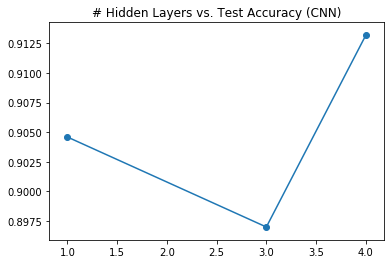

In [107]:
plot_accuracies([1, 3, 4], cnn_accs, "# Hidden Layers vs. Test Accuracy (CNN)")